In [1]:
#MODEL1: GM23338_NANOG

In [26]:
from keras.models import load_model
model = load_model('GM23338.h5')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 196, 128)          2688      
                                                                 
 batch_normalization_24 (Ba  (None, 196, 128)          512       
 tchNormalization)                                               
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 49, 128)           0         
 ng1D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 49, 128)           0         
                                                                 
 conv1d_18 (Conv1D)          (None, 45, 256)           164096    
                                                                 
 batch_normalization_25 (Ba  (None, 45, 256)         

375/375 [==============================] - 6s 15ms/step
Accuracy: 0.9012
ROC AUC Score: 0.9665


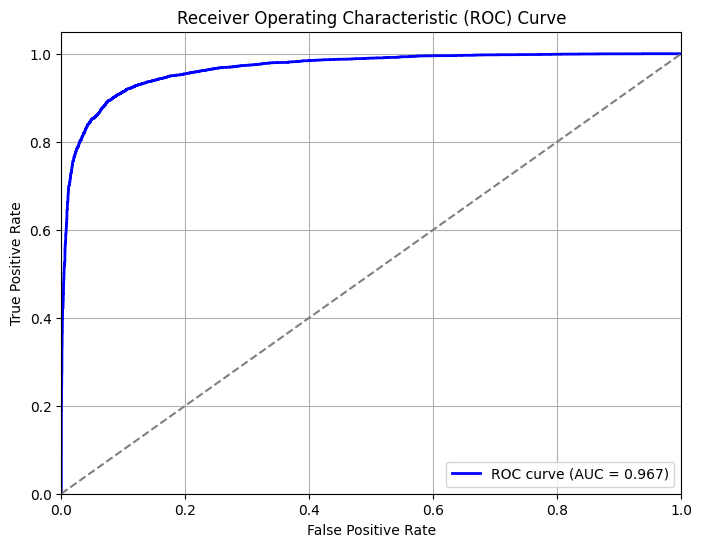

In [27]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('GM23338_mergedNANOG.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 7s 19ms/step
Accuracy: 0.8353
ROC AUC Score: 0.9218


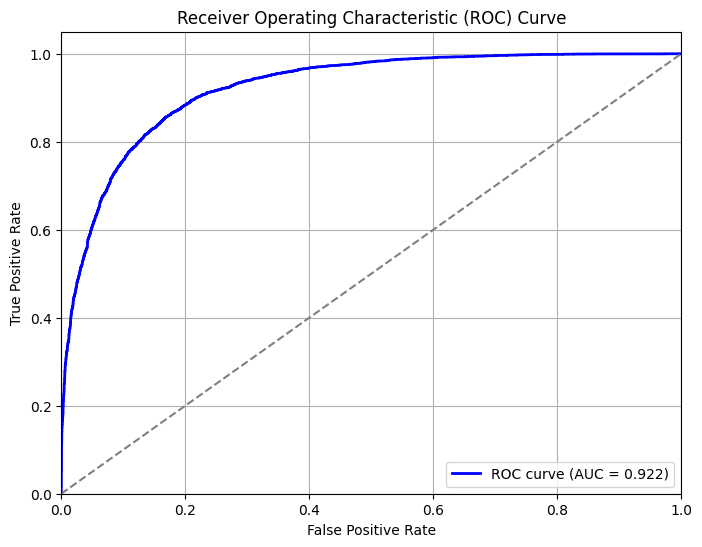

In [28]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('H1_mergedNANOG.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 7s 19ms/step
Accuracy: 0.8642
ROC AUC Score: 0.9398


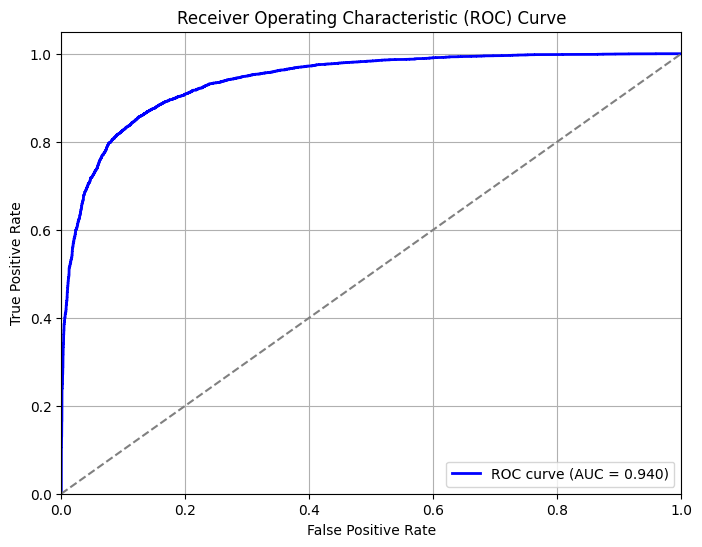

In [29]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('GM23338_mergedPOU5F1.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 5s 14ms/step
Accuracy: 0.8132
ROC AUC Score: 0.8979


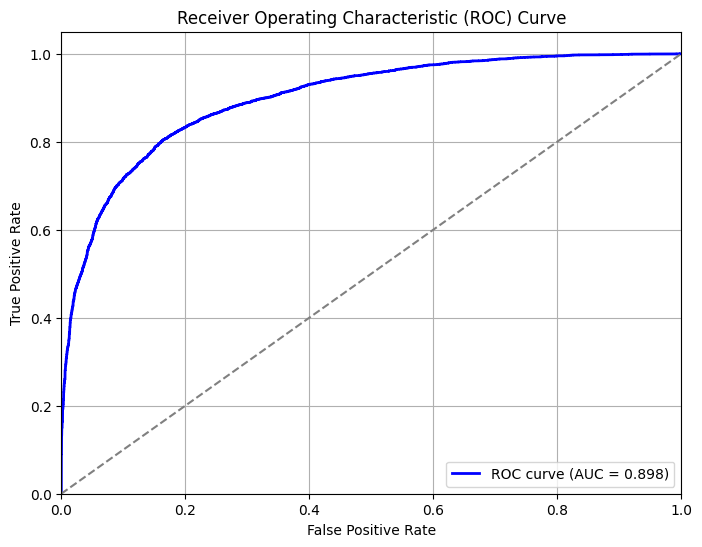

In [30]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('H1_mergedPOU5F1.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [2]:
#MODEL2: GM2238_POU5F1

In [3]:
from keras.models import load_model
model = load_model('GM23338_mergedPOU5F1.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 196, 128)          2688      
                                                                 
 batch_normalization_8 (Bat  (None, 196, 128)          512       
 chNormalization)                                                
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 49, 128)           0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 49, 128)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 45, 256)           164096    
                                                                 
 batch_normalization_9 (Bat  (None, 45, 256)          

375/375 [==============================] - 6s 16ms/step
Accuracy: 0.7923
ROC AUC Score: 0.9106


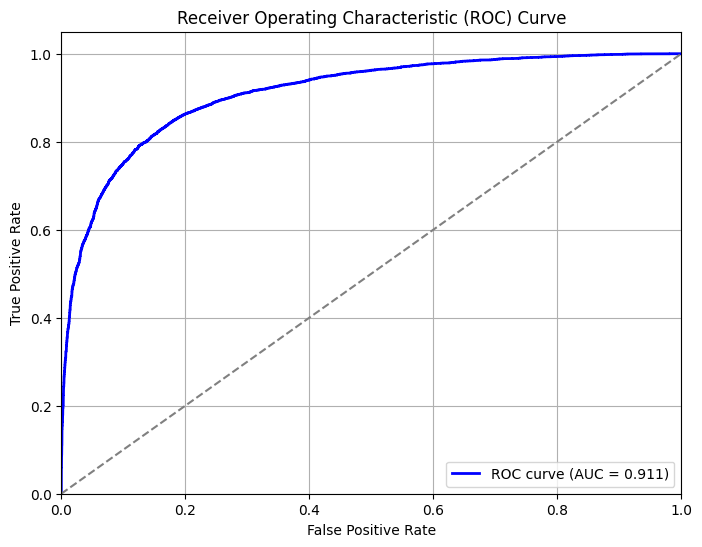

In [18]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('GM23338_mergedNANOG.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 9s 24ms/step
Accuracy: 0.9247
ROC AUC Score: 0.9867


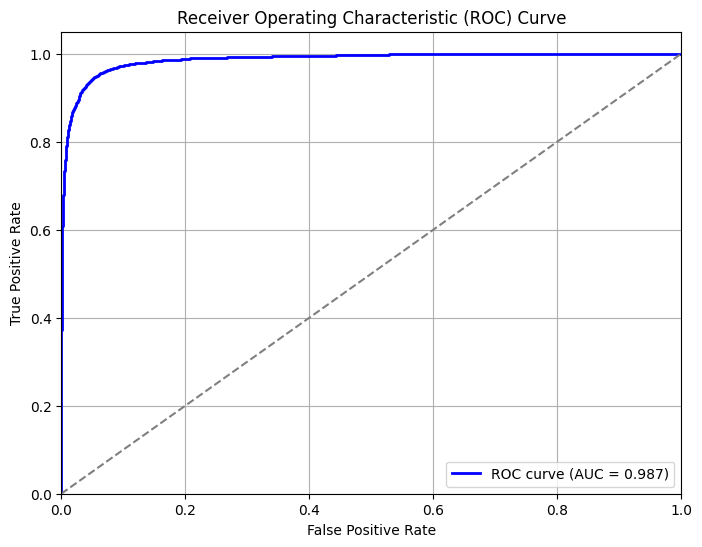

In [20]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('GM23338_mergedPOU5F1.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 8s 20ms/step
Accuracy: 0.8263
ROC AUC Score: 0.9249


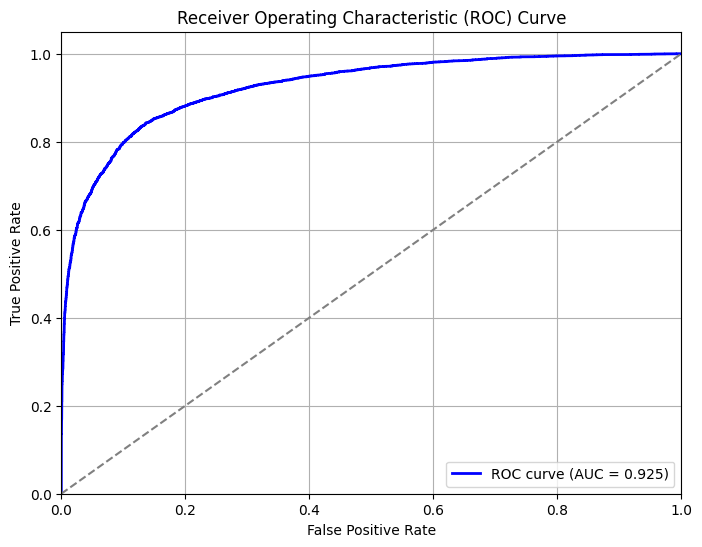

In [4]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('H1_mergedPOU5F1.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 7s 18ms/step
Accuracy: 0.7763
ROC AUC Score: 0.9145


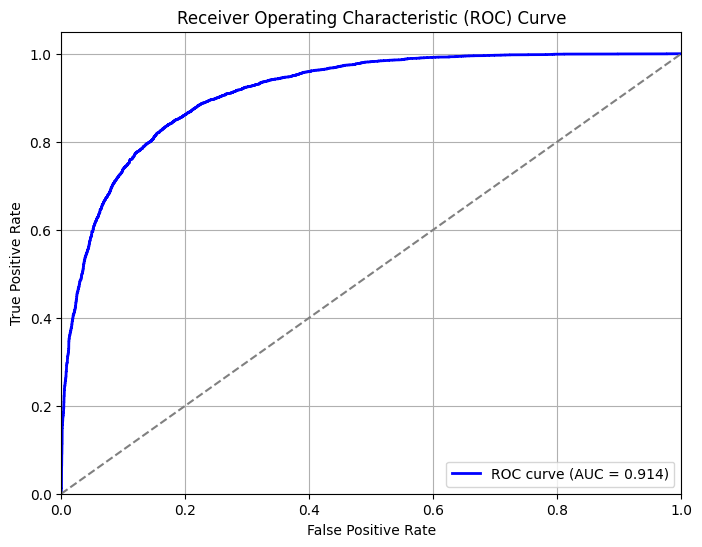

In [5]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('H1_mergedNANOG.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [6]:
#MODEL3: H1_NANOG

In [7]:
from keras.models import load_model
model = load_model('H1_NANOG.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 196, 128)          2688      
                                                                 
 batch_normalization_6 (Bat  (None, 196, 128)          512       
 chNormalization)                                                
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 49, 128)           0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 49, 128)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 45, 256)           164096    
                                                                 
 batch_normalization_7 (Bat  (None, 45, 256)          

375/375 [==============================] - 6s 15ms/step
Accuracy: 0.8239
ROC AUC Score: 0.9034


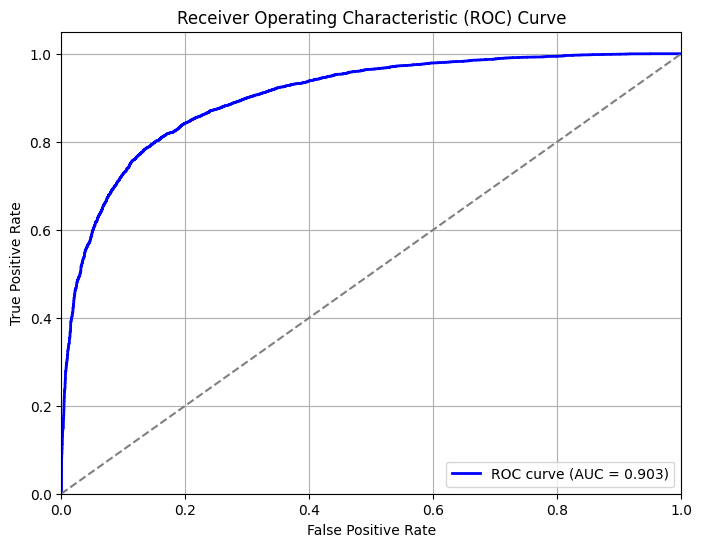

In [8]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('GM23338_mergedNANOG.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 10s 26ms/step
Accuracy: 0.8389
ROC AUC Score: 0.9200


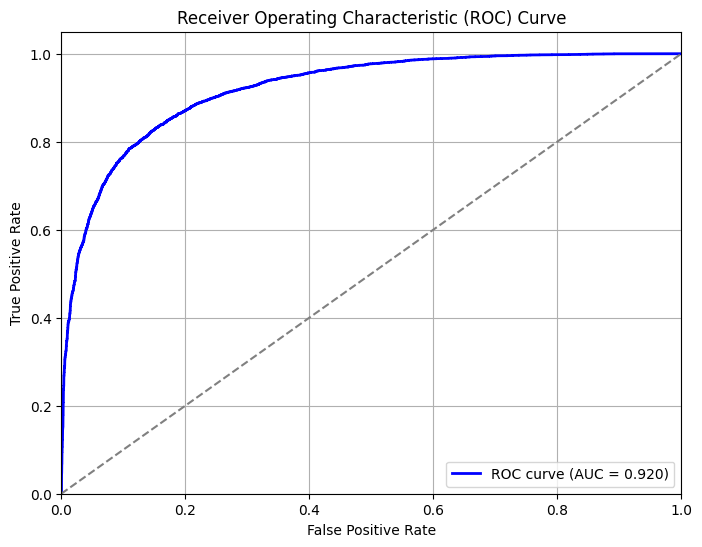

In [9]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('GM23338_mergedPOU5F1.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 9s 23ms/step
Accuracy: 0.9370
ROC AUC Score: 0.9829


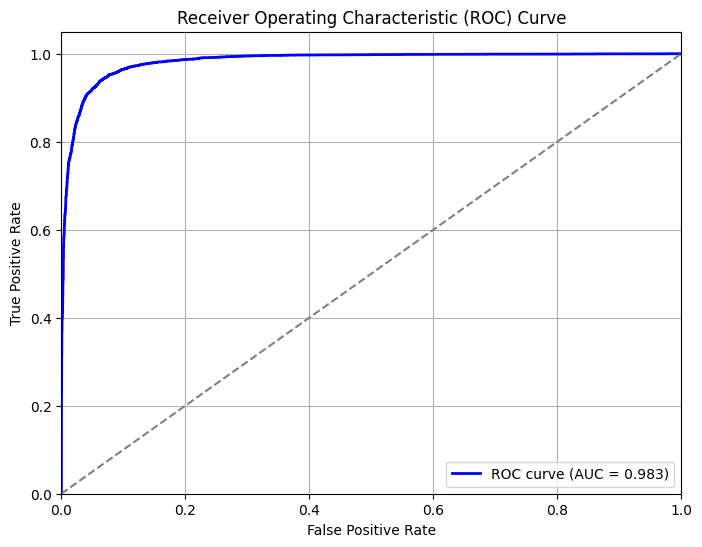

In [10]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('H1_mergedNANOG.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 9s 25ms/step
Accuracy: 0.8189
ROC AUC Score: 0.9014


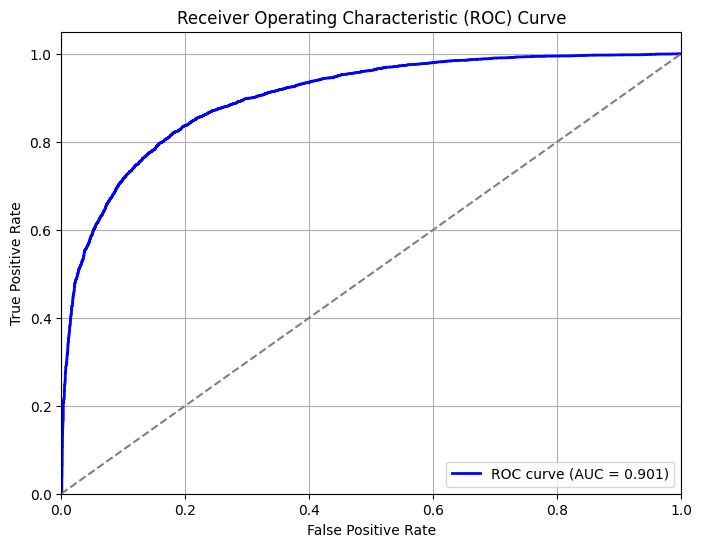

In [12]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('H1_mergedPOU5F1.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [13]:
#MODEL4: H1_POU5F1

In [19]:
from keras.models import load_model
model = load_model('H1_mergedPOU5F1.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 196, 128)          2688      
                                                                 
 batch_normalization_10 (Ba  (None, 196, 128)          512       
 tchNormalization)                                               
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 49, 128)           0         
 ng1D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 49, 128)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 45, 256)           164096    
                                                                 
 batch_normalization_11 (Ba  (None, 45, 256)          

375/375 [==============================] - 6s 16ms/step
Accuracy: 0.7737
ROC AUC Score: 0.8744


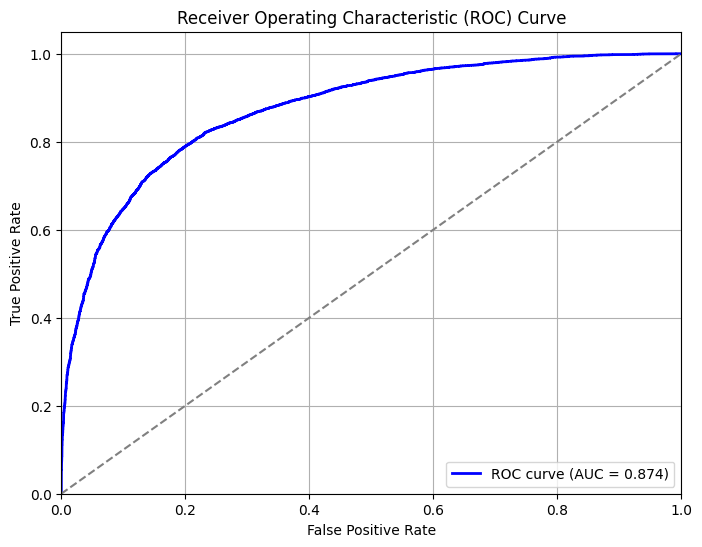

In [20]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('GM23338_mergedNANOG.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 5s 14ms/step
Accuracy: 0.8556
ROC AUC Score: 0.9330


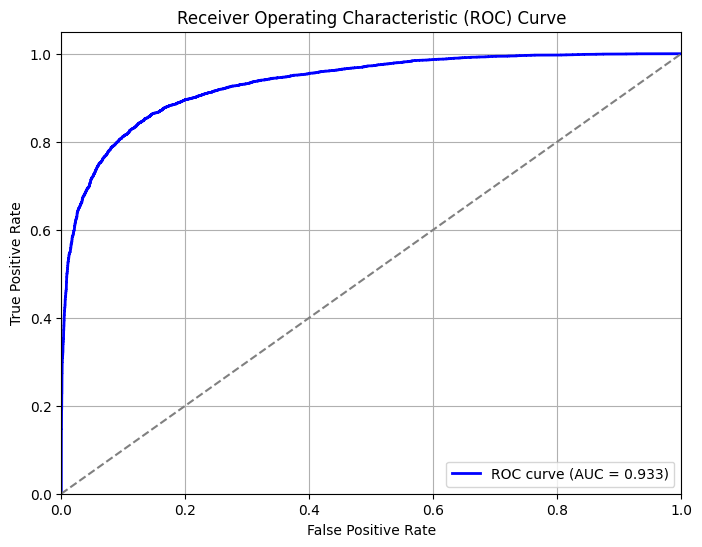

In [21]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('GM23338_mergedPOU5F1.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 7s 19ms/step
Accuracy: 0.8110
ROC AUC Score: 0.9133


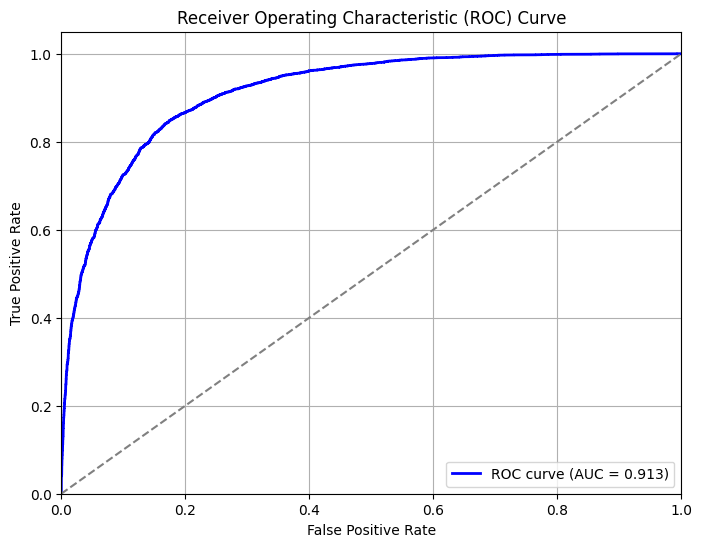

In [22]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('H1_mergedNANOG.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



375/375 [==============================] - 9s 24ms/step
Accuracy: 0.9168
ROC AUC Score: 0.9760


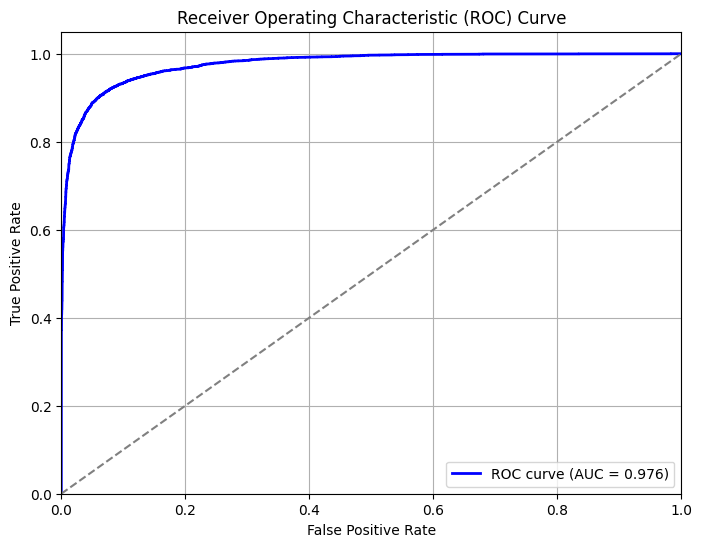

In [23]:
import numpy as np
import pandas as pd

# Load data from the text file (replace 'GM23338_merged.txt' with the actual file path)
data = pd.read_csv('H1_mergedPOU5F1.txt', sep='\t', header=None)
sequences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

# One-hot encode sequences, handling 'N'
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    encoded_seq = np.array([mapping.get(base, [0, 0, 0, 0]) for base in sequence])
    # Ensure all encoded sequences have the same length (200 in this case)
    if encoded_seq.shape[0] < 200:
        padding = np.zeros((200 - encoded_seq.shape[0], 4))
        encoded_seq = np.concatenate((encoded_seq, padding), axis=0)
    return encoded_seq

one_hot_sequences = np.array([one_hot_encode(seq) for seq in sequences])

# Determine sequence length
sequence_length = one_hot_sequences.shape[1]
y_pred = model.predict(one_hot_sequences)

from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming you have ground truth labels (labels) and predicted values (y_pred)
# For binary classification (0/1 labels):
binary_labels = (labels > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(binary_labels, (y_pred > 0.5).astype(int))
print(f"Accuracy: {accuracy:.4f}")

# ROC AUC score
roc_auc = roc_auc_score(binary_labels, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(binary_labels, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



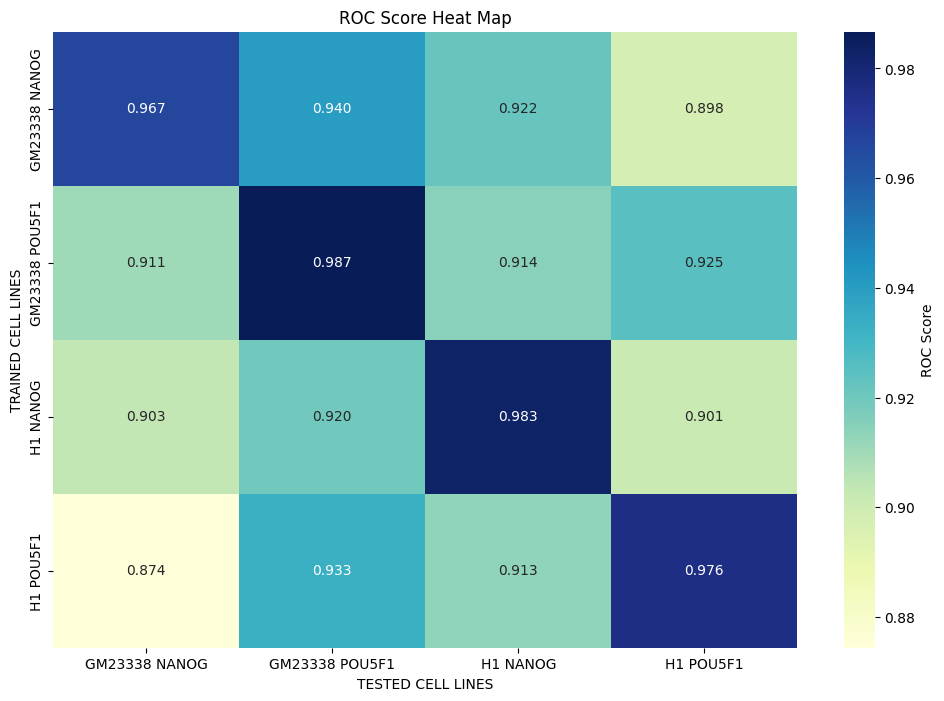

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data extracted from the image
data = {
    'TRAINED CELL LINES': ['GM23338 NANOG', 'GM23338 NANOG', 'GM23338 NANOG', 'GM23338 NANOG', 'H1 NANOG', 'H1 NANOG', 'H1 NANOG', 'H1 NANOG',
              'GM23338 POU5F1', 'GM23338 POU5F1', 'GM23338 POU5F1', 'GM23338 POU5F1', 'H1 POU5F1', 'H1 POU5F1', 'H1 POU5F1', 'H1 POU5F1'],
    'TESTED CELL LINES': ['GM23338 NANOG', 'H1 NANOG', 'GM23338 POU5F1', 'H1 POU5F1', 'GM23338 NANOG', 'H1 NANOG', 'GM23338 POU5F1', 'H1 POU5F1',
                  'GM23338 NANOG', 'H1 NANOG', 'GM23338 POU5F1', 'H1 POU5F1', 'GM23338 NANOG', 'H1 NANOG', 'GM23338 POU5F1', 'H1 POU5F1'],
    'ROC': [0.9665, 0.9218, 0.9398, 0.8979, 0.9034, 0.9829, 0.92, 0.9014, 0.9106, 0.9145, 0.9867, 0.9249, 0.8744, 0.9133, 0.933, 0.976]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the DataFrame
roc_pivot = df.pivot(index="TRAINED CELL LINES", columns="TESTED CELL LINES", values="ROC")

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(roc_pivot, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'ROC Score'})
plt.title('ROC Score Heat Map')
plt.show()
